In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


df = pd.read_excel('Group1_DATARUMAH.xlsx')

In [ ]:
df

,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS,Daerah,Range
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0,Tebet Timur,100jt-16m
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2,Tebet,100jt-16m
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4,Tebet,100jt-16m
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0,Tebet,100jt-16m
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3,Tebet,100jt-16m
...,...,...,...,...,...,...,...,...,...,...
1005,1006,Rumah Strategis Akses Jalan 2mobil Di Menteng ...,9000000000,450,550,10,10,1,Menteng Dalam,100jt-16m
1006,1007,Tebet Rumah Siap Huni Jln 2 Mbl Nyaman,4000000000,160,140,4,3,1,Tebet,100jt-16m
1007,1008,"Di Kebun Baru Rumah Terawat, Area Strategis",4000000000,139,230,4,4,1,Kebon baru,100jt-16m
1008,1009,Dijual Cepat Rumah Komp Depkeu Dr Soepomo Tebe...,19000000000,360,606,7,4,1,Tebet,"16,1m-32m"


In [ ]:
df['JT'] = df['HARGA']//100000000

In [ ]:
fitur = df.drop(['NO','NAMA RUMAH','HARGA','LB','KT','KM','GRS','Daerah','Range'], axis=1)

In [ ]:
fitur

,LT,JT
0,220,38
1,137,46
2,250,30
3,25,4
4,355,90
...,...,...
1005,550,90
1006,140,40
1007,230,40
1008,606,190


In [ ]:
from sklearn.metrics import silhouette_score
clusters_kmeans = KMeans(n_clusters=3, random_state=0).fit(fitur)
OMP_NUM_THREADS=1

In [ ]:
clusters_kmeans.fit(fitur)

KMeans(n_clusters=3, random_state=0)

In [ ]:
labels = clusters_kmeans.predict(fitur)

In [ ]:
score = silhouette_score(fitur, labels)

In [ ]:
print(score)

0.6083209515644834


In [ ]:
cluster_label = clusters_kmeans.labels_
cluster_label

array([0, 0, 2, ..., 0, 1, 2], dtype=int32)

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

sample_silhouette_values = silhouette_samples(fitur,cluster_label)
sample_silhouette_values

array([0.29614564, 0.80298616, 0.04693719, ..., 0.16672709, 0.51030282,
       0.54127458])

In [ ]:
new_data = df.copy()

clstr = pd.DataFrame(cluster_label, 
                    columns=['cluster_label'])
new_data['cluster_label'] = clstr

In [ ]:
new_data.head()

,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS,Daerah,Range,JT,cluster_label
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0,Tebet Timur,100jt-16m,38,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2,Tebet,100jt-16m,46,0
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4,Tebet,100jt-16m,30,2
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0,Tebet,100jt-16m,4,0
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3,Tebet,100jt-16m,90,2


/usr/local/lib/python3.8/dist-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


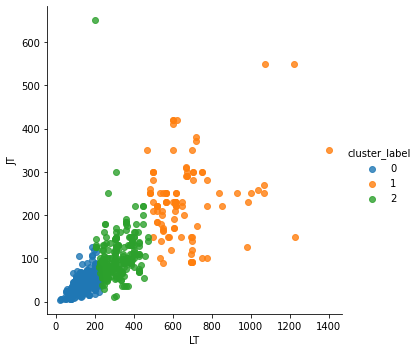

In [ ]:
facet = sns.lmplot(data=new_data, x='LT', y='JT', hue='cluster_label',
                  fit_reg=False, legend=True, legend_out=True)

In [ ]:
new_data['cluster_label'].unique()

array([0, 2, 1], dtype=int32)

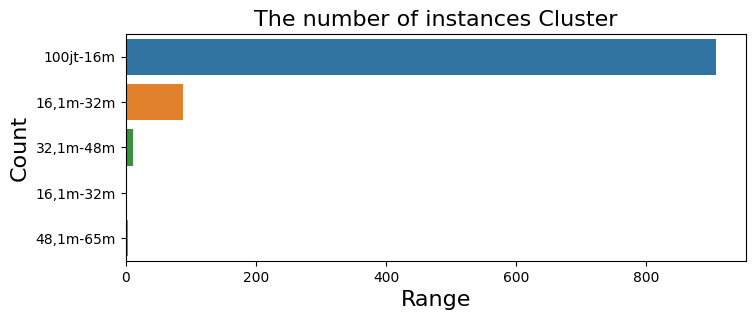

In [ ]:
plt.subplots(figsize=(8,3), dpi=100)
ax = sns.countplot(data=df, y='Range')
ax.set_title("The number of instances Cluster", fontsize=16)
ax.set_xlabel('Range', fontsize=16)
ax.set_ylabel('Count',fontsize=16,rotation=90)
ax.grid(False)

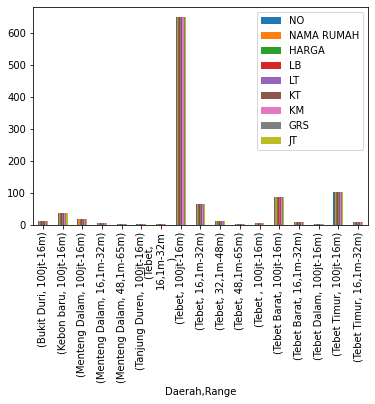

In [ ]:
df_group = df.groupby(['Daerah','Range']).count()
df_group.plot(kind='bar')
plt.show()

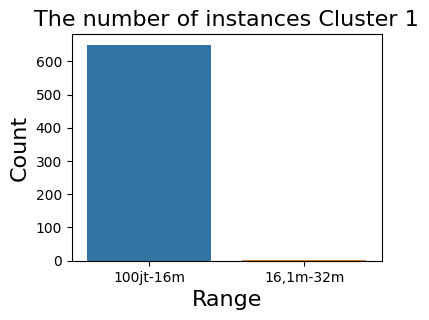

In [ ]:
Group1 = new_data[new_data['cluster_label']==0]
plt.subplots(figsize=(4,3), dpi=100)
ax = sns.countplot(data=Group1, x='Range')
ax.set_title("The number of instances Cluster 1", fontsize=16)
ax.set_xlabel('Range', fontsize=16)
ax.set_ylabel('Count',fontsize=16,rotation=90)
ax.grid(False)

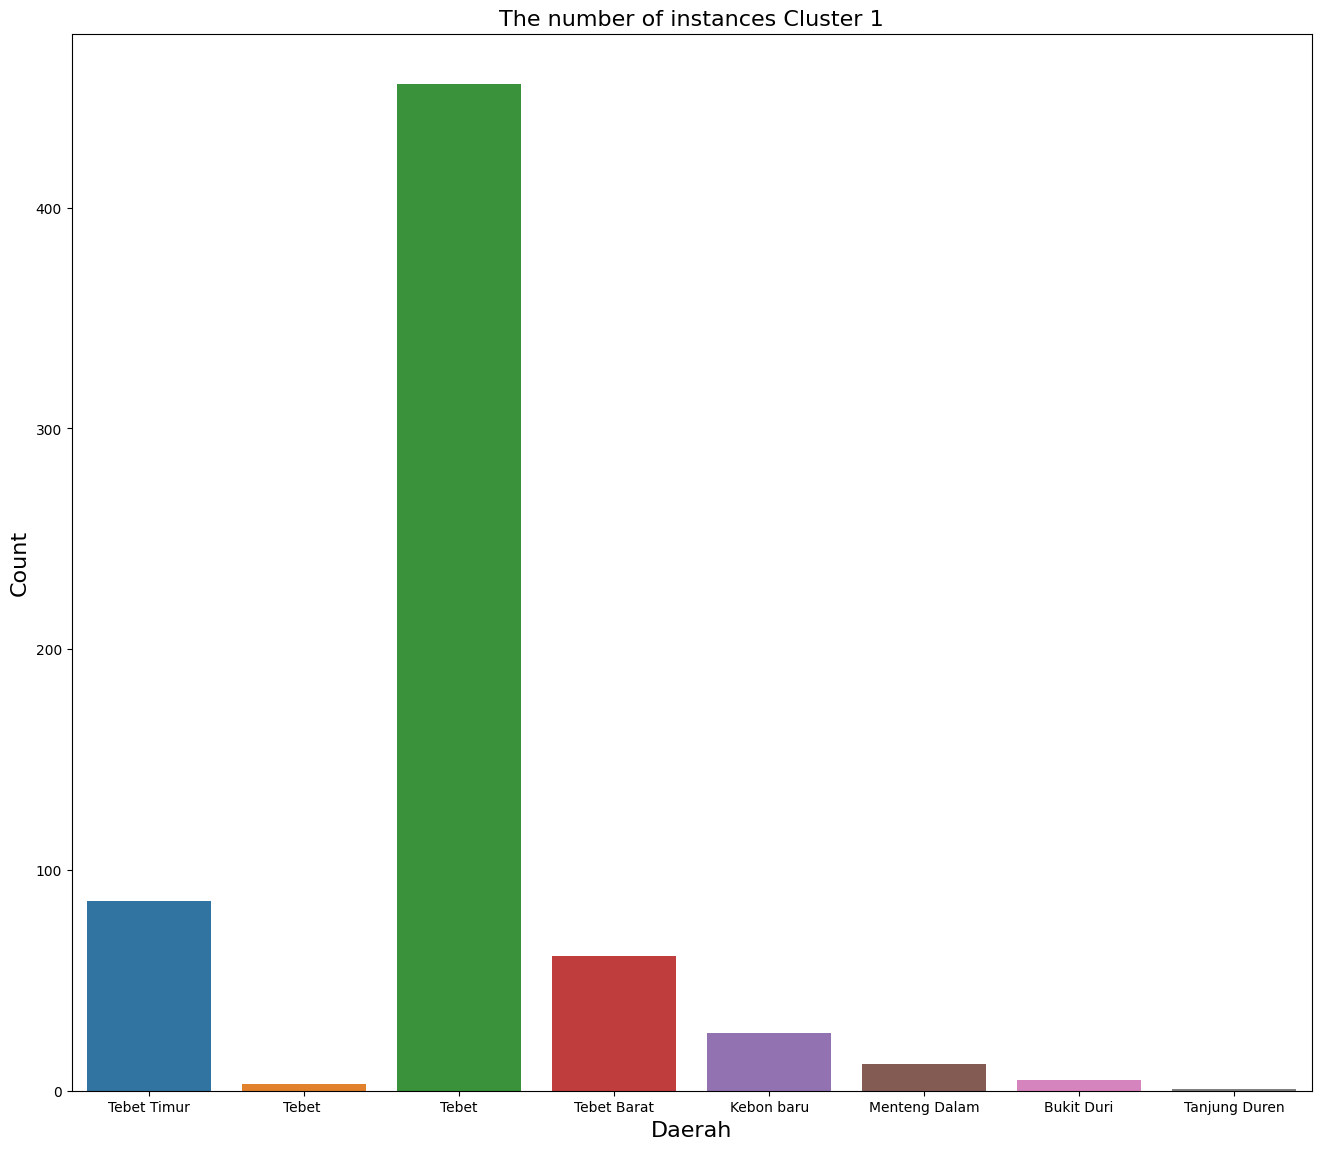

In [ ]:
Group1 = new_data[new_data['cluster_label']==0]
plt.subplots(figsize=(16,14), dpi=100)
ax = sns.countplot(data=Group1, x='Daerah')
ax.set_title("The number of instances Cluster 1", fontsize=16)
ax.set_xlabel('Daerah', fontsize=16)
ax.set_ylabel('Count',fontsize=16,rotation=90)
ax.grid(False)

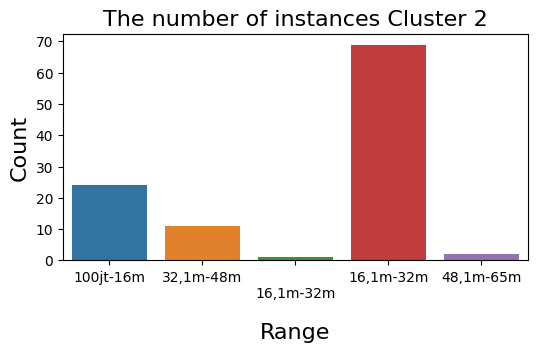

In [ ]:
Group1 = new_data[new_data['cluster_label']==1]
plt.subplots(figsize=(6,3), dpi=100)
ax = sns.countplot(data=Group1, x='Range')
ax.set_title("The number of instances Cluster 2", fontsize=16)
ax.set_xlabel('Range', fontsize=16)
ax.set_ylabel('Count',fontsize=16,rotation=90)
ax.grid(False)

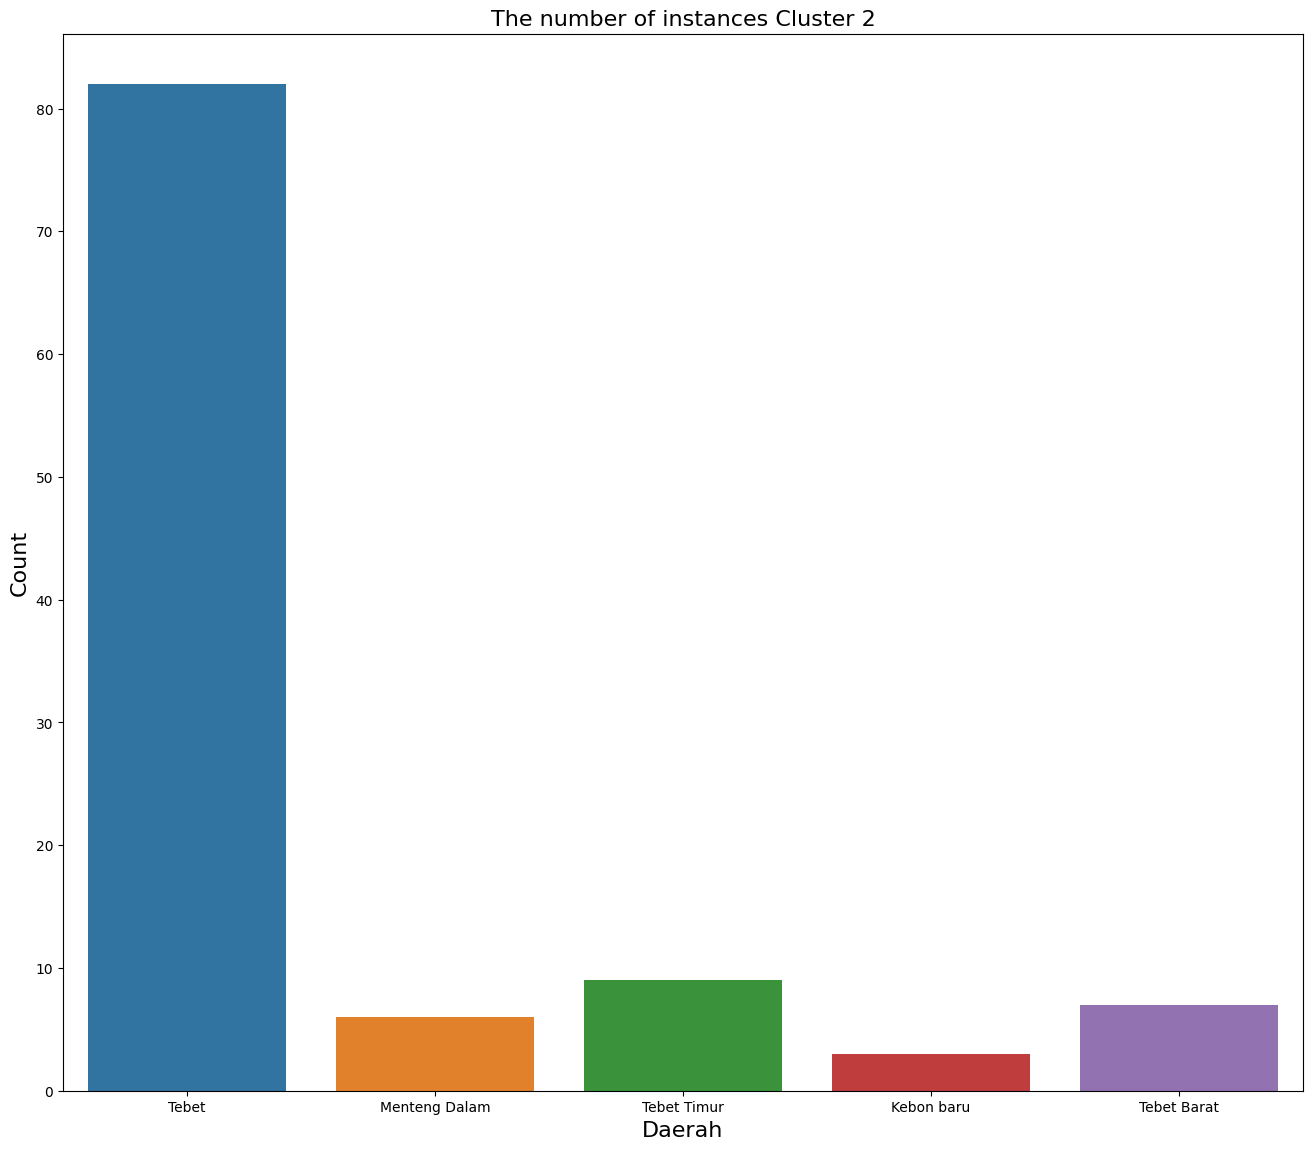

In [ ]:
Group1 = new_data[new_data['cluster_label']==1]
plt.subplots(figsize=(16,14), dpi=100)
ax = sns.countplot(data=Group1, x='Daerah')
ax.set_title("The number of instances Cluster 2", fontsize=16)
ax.set_xlabel('Daerah', fontsize=16)
ax.set_ylabel('Count',fontsize=16,rotation=90)
ax.grid(False)

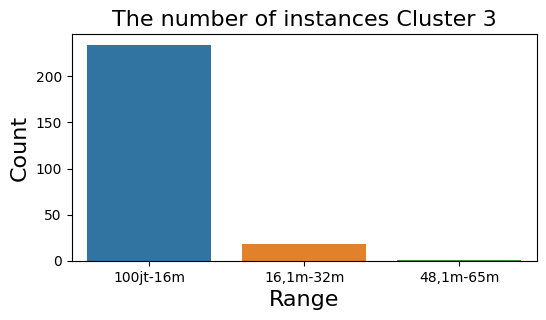

In [ ]:
Group1 = new_data[new_data['cluster_label']==2]
plt.subplots(figsize=(6,3), dpi=100)
ax = sns.countplot(data=Group1, x='Range')
ax.set_title("The number of instances Cluster 3", fontsize=16)
ax.set_xlabel('Range', fontsize=16)
ax.set_ylabel('Count',fontsize=16,rotation=90)
ax.grid(False)

In [ ]:
fitur.min

<bound method NDFrame._add_numeric_operations.<locals>.min of        LT   JT
0     220   38
1     137   46
2     250   30
3      25    4
4     355   90
...   ...  ...
1005  550   90
1006  140   40
1007  230   40
1008  606  190
1009  430  105

[1010 rows x 2 columns]>

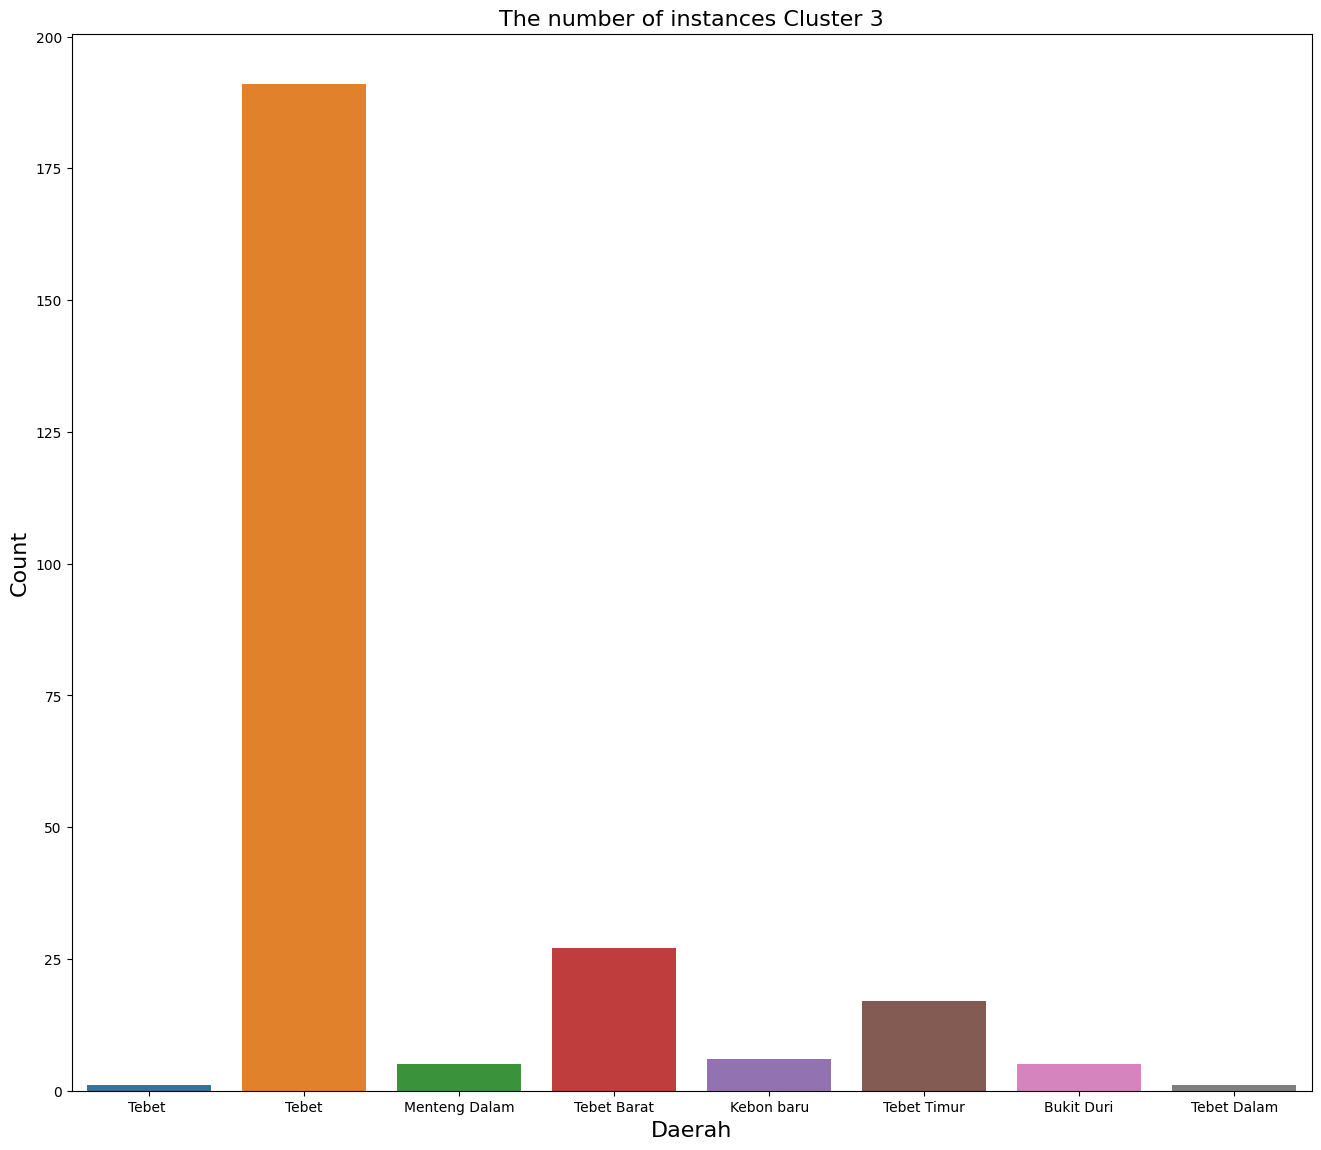

In [ ]:
Group1 = new_data[new_data['cluster_label']==2]
plt.subplots(figsize=(16,14), dpi=100)
ax = sns.countplot(data=Group1, x='Daerah')
ax.set_title("The number of instances Cluster 3", fontsize=16)
ax.set_xlabel('Daerah', fontsize=16)
ax.set_ylabel('Count',fontsize=16,rotation=90)
ax.grid(False)